#Taller Pandas - Numpy

### **Instrucciones:**

1. Formula 1 pregunta de análisis sobre tu conjunto de datos
2. Utilizando Pandas y Numpy:
  - Limpieza de datos (Pandas: dropna, fillna, replace, etc.)
  - Filtrado y selección de datos
  - Transformación de columnas, creación de variables nuevas
  - Agrupaciones y resúmenes (groupby)
  - Conversión a array NumPy para operaciones matemáticas rápidas (media, desvío, normalización, operaciones vectorizadas)
3. Responde la pregunta planteada con una breve interpretación.

### **Ejemplos de preguntas para el reto:**
- ¿Cuál es el promedio de ventas por mes?
- ¿Cómo cambian la cantidad de productos exportados a lo largo del tiempo?
- ¿Hay valores atípicos en alguna columna numérica? ¿Cómo los tratarías?
- ¿Cuál es la categoría más frecuente y qué la distingue en el dataset?
- ¿Qué porcentaje de transacciones tiene una cantidad vendida superior al promedio?
- ¿Qué días tuvieron ventas totales fuera de lo común (muy altas o muy bajas)?

---
## Ejemplo
https://www.kaggle.com/datasets/akshaygaikwad448/pizza-delivery-data-with-enhanced-features

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pizza_data = pd.read_excel('/content/drive/MyDrive/Data Science Bit 202505/Clases/Clase 7: Taller Pandas - Numpy/Enhanced_pizza_sell_data_2024-25.xlsx')
pizza_data.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


## Preguntas de Análisis

### 1. ¿Cuales son los pedidos con tiempos de entrega demasiado cortos o demasiado largos? (Valores atípicos)

In [8]:
delivery_time = pizza_data['Delivery Duration (min)']
delivery_time = np.array(delivery_time)

In [9]:
q1 = np.percentile(delivery_time, 25)
q2 = np.percentile(delivery_time, 50)
q3 = np.percentile(delivery_time, 75)
iqr = q3 - q1

print(f"El primer cuartil (percentil 25) es igual a: {q1}")
print(f"El segundo cuartil (percentil 50) es igual a: {q2}")
print(f"El tercer cuartil (percentil 75) es igual a: {q3}")
print(f"El rango intercuartil es igual a: {iqr}")

El primer cuartil (percentil 25) es igual a: 25.0
El segundo cuartil (percentil 50) es igual a: 30.0
El tercer cuartil (percentil 75) es igual a: 30.0
El rango intercuartil es igual a: 5.0


In [10]:
limite_inferior = max(q1 - 1.5 * iqr, delivery_time[delivery_time > (q1 - 1.5 * iqr)].min())
limite_superior = min(q3 + 1.5 * iqr, delivery_time[delivery_time < (q3 + 1.5 * iqr)].max())
print(f"El límite inferior es igual a: {limite_inferior}")
print(f"El límite superior es igual a: {limite_superior}")

El límite inferior es igual a: 20
El límite superior es igual a: 35


In [11]:
delivery_muy_rapido = delivery_time[delivery_time < limite_inferior]
print(f"Número de transacciones con tiempos de entrega muy cortos: {len(delivery_muy_rapido)}")
delivery_muy_demorado = delivery_time[delivery_time > limite_superior]
print(f"Número de transacciones con tiempos de entrega muy altos: {len(delivery_muy_demorado)}")
print(f"Número de transacciones atípicas: {len(delivery_muy_rapido) + len(delivery_muy_demorado)}")

Número de transacciones con tiempos de entrega muy cortos: 1
Número de transacciones con tiempos de entrega muy altos: 166
Número de transacciones atípicas: 167


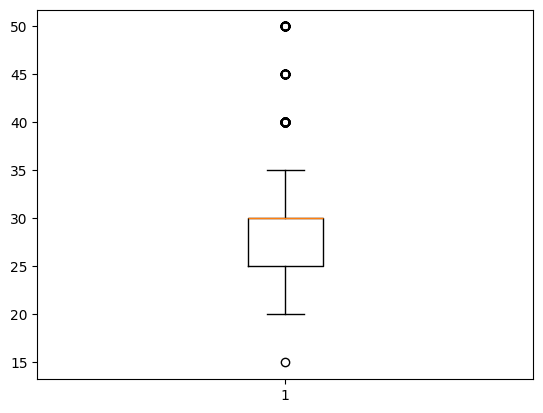

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(pizza_data['Delivery Duration (min)'])
plt.show()

SOLUCION

¿Cuál es el ingreso promedio por cliente en cada país, y qué país genera más ingresos en promedio por cliente?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV

df = pd.read_csv("ventas.csv")
df.head()





,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [20]:
# LIMPIEZA DE DATOS


# Eliminar filas con valores nulos en columnas críticas (ID Cliente, País y Monto)
# dropna elimina cualquier fila que tenga valores vacíos (NaN) en las columnas indicadas
# Esto garantiza que no trabajamos con datos incompletos en nuestro análisis
df.dropna(subset=["ID Cliente", "País", "Monto"], inplace=True)

# Reemplazar comas por puntos en la columna 'Monto' y convertirla a tipo float
# Algunos valores usan coma como separador decimal, lo cual es incorrecto para análisis numérico
# str.replace cambia la coma por punto y luego convertimos a float
# Esto permite que los valores se puedan sumar correctamente
df["Monto"] = df["Monto"].str.replace(",", ".").astype(float)

# Eliminar registros con valores negativos en "Cantidad" o "Monto"
# Valores negativos en estos campos probablemente son errores o devoluciones
# Solo se conservan las filas con cantidades y montos positivos
df = df[(df["Cantidad"] > 0) & (df["Monto"] > 0)]

In [ ]:
# ---------------------------
# TRANSFORMACIÓN Y AGRUPACIÓN
# ---------------------------

# Agrupar por país y cliente para obtener el ingreso total por cliente
# groupby crea una agrupación por país y cliente
# sum() calcula el total gastado por cada cliente en su país
ingresos_por_cliente = df.groupby(["País", "ID Cliente"])['Monto'].sum().reset_index()

# Agrupar por país para obtener el ingreso promedio por cliente
# Ahora agrupamos solo por país y sacamos el promedio de los ingresos por cliente
promedio_por_pais = ingresos_por_cliente.groupby("País")["Monto"].mean().reset_index()

# Renombrar columna para mayor claridad
promedio_por_pais.rename(columns={"Monto": "Ingreso Promedio por Cliente"}, inplace=True)



In [28]:

# ---------------------------
# ANÁLISIS CON NUMPY
# ---------------------------


# iBA USAR ESTE CODIGO promedio_por_pais["Ingreso Promedio por Cliente"].mean()), PERO LEYENFO ME DICEQEU ES MEJOR CONVERTIRLO A ARRAY
valores = promedio_por_pais["Ingreso Promedio por Cliente"].to_numpy()

# Calcular la media (promedio) general de ingresos entre todos los países
media = np.mean(valores)

# Calcular la desviación estándar (qué tanto varían los ingresos entre países)
desviacion = np.std(valores)

# Normalizar los valores para comparar mejor: (valor - media) / desviación estándar
normalizados = (valores - media) / desviacion

# Agregar los valores normalizados al DataFrame para posibles análisis adicionales
promedio_por_pais["Ingreso Normalizado"] = normalizados

# Encontrar el país con mayor ingreso promedio
# idxmax da el índice del valor máximo, y lo usamos para extraer el país con más ingreso promedio
pais_top = promedio_por_pais.loc[promedio_por_pais["Ingreso Promedio por Cliente"].idxmax()]

promedio_por_pais.head()

,País,Ingreso Promedio por Cliente,Ingreso Normalizado
0,Australia,15391.256667,0.629910
1,Austria,927.152727,-0.327049
2,Bahrain,274.200000,-0.370249
3,Belgium,1647.853600,-0.279366
4,Brazil,1143.600000,-0.312728


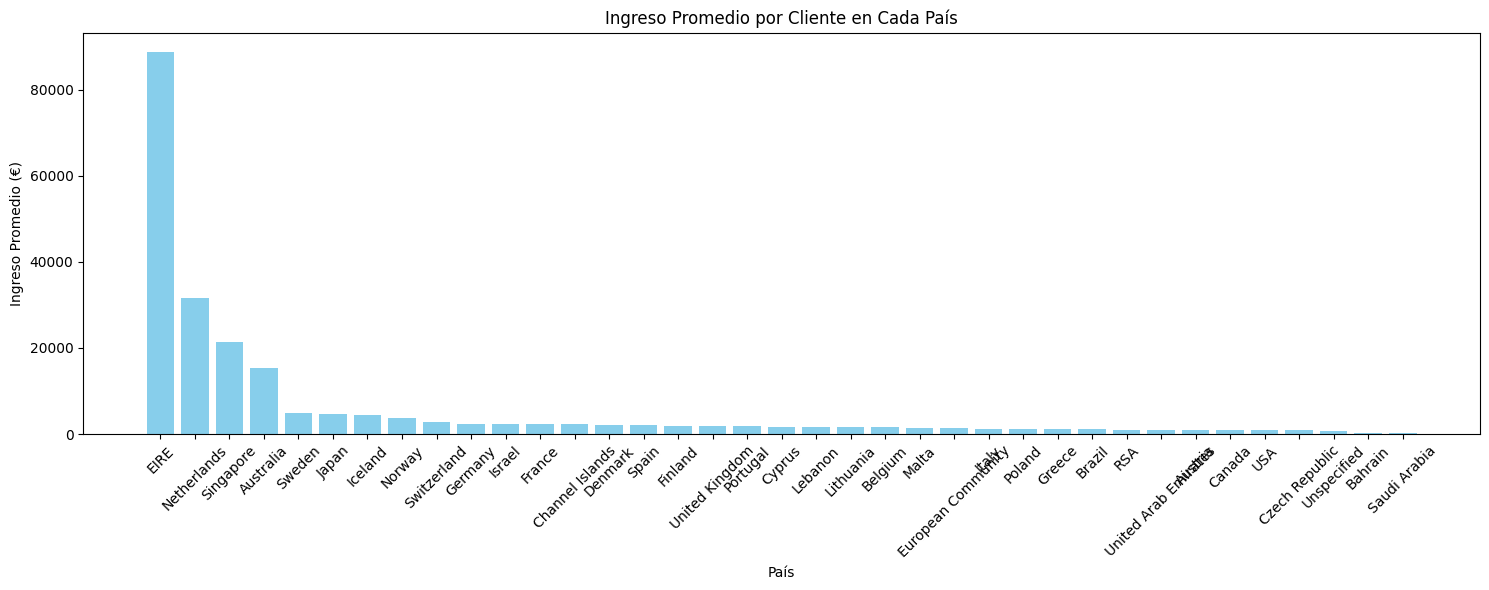

Interpretación de Resultados:

El ingreso promedio por cliente se calcula sumando las compras de cada cliente en un país y promediando entre todos los clientes de ese país.

El país con mayor ingreso promedio por cliente es: EIRE, con un ingreso promedio de €88774.07.
La media general de ingresos promedio por país es de €5870.38, con una desviación estándar de €15114.66.


In [22]:
# ---------------------------
# VISUALIZACIÓN
# ---------------------------

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Ordenamos los datos por ingreso promedio para una mejor visualización
ordenado = promedio_por_pais.sort_values("Ingreso Promedio por Cliente", ascending=False)

# Crear las barras
plt.bar(ordenado["País"], ordenado["Ingreso Promedio por Cliente"], color="skyblue")

# Rotar etiquetas del eje X para mejor lectura
plt.xticks(rotation=45)

# Agregar título y etiquetas
plt.title("Ingreso Promedio por Cliente en Cada País")
plt.xlabel("País")
plt.ylabel("Ingreso Promedio (€)")
plt.tight_layout()
plt.show()


print("Interpretación de Resultados:\n")
print("El ingreso promedio por cliente se calcula sumando las compras de cada cliente en un país y promediando entre todos los clientes de ese país.")
print(f"\nEl país con mayor ingreso promedio por cliente es: {pais_top['País']}, con un ingreso promedio de €{pais_top['Ingreso Promedio por Cliente']:.2f}.")
print(f"La media general de ingresos promedio por país es de €{media:.2f}, con una desviación estándar de €{desviacion:.2f}.")
